In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


inputs = keras.Input(shape = (784,))

In [2]:
print(inputs.shape)

(None, 784)


In [3]:
dense = layers.Dense(64,activation = 'relu')
x = dense(inputs)

2021-11-29 10:34:20.239292: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-11-29 10:34:20.501167: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.62GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-11-29 10:34:20.504393: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 1 with properties: 
pciBusID: 0000:05:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-11-29 10:34:20.508860: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 2 with properties: 
pciBusID: 0000:06:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
20

In [4]:
x = layers.Dense(64, activation = 'relu')(x)
outputs = layers.Dense(10,activation = 'softmax')(x)
#记住最后要接一个softmax层

In [5]:
model = keras.Model(inputs = inputs, outputs = outputs, name = "mnist_model")

In [6]:
print(model.summary())

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None


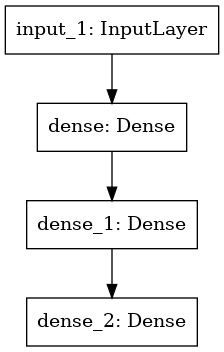

In [7]:
# import pydot
# import pydotplus
# from pydotplus import graphviz
keras.utils.plot_model(model, "1.png")

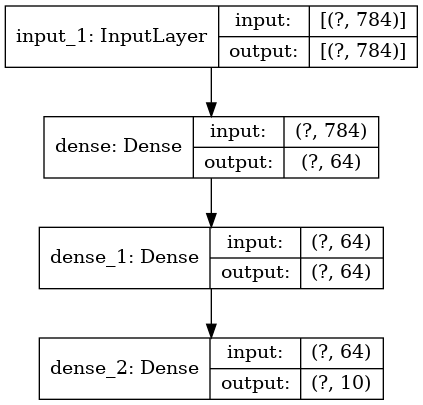

In [8]:
keras.utils.plot_model(model, "2.png", show_shapes = True)

使用keras.utils.plot_model(model, "name", show_shapes)传入模型，名字，show_shapes = True or False表示是否输出形状
model.summary()可以输出模型的参数，层数
keras与pytorch的对比，keras不用加上输出层的shape

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [11]:

x_train = x_train.reshape(x_train.shape[0],-1).astype("float32") / 255
x_test = x_test.reshape(x_test.shape[0],-1).astype("float32") / 255
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


把单个图片二维向量转换为一维的，即拉平，因为输入数据就是要这样，拉平的方法是.reshape(x_train.shape[0], -1)
注意一点，传入的数据必须是float32类型的，所以使用astype("float32")进行类型转换
还有除以255是因为像素值范围为[0,255]，除以255就可以使像素值变为[0,1]


In [12]:
#对模型进行配置
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             optimizer = keras.optimizers.RMSprop(),
             metrics = ['accuracy'])

1. 对模型需要配置什么呢？
    -损失函数
        - 通过keras.losses调用
    -优化器
        - 通过keras.optimizers, 注意不要少了s
    -评估方法
        - 直接使用metrics = 就可以使用了

In [13]:
#拟合

history = model.fit(x_train, y_train, batch_size = 64, epochs = 10, validation_split = 0.2)

Epoch 1/10


2021-11-29 10:34:34.150012: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


750/750 [==============================] - 3s 4ms/step - loss: 1.6028 - accuracy: 0.8832 - val_loss: 1.5379 - val_accuracy: 0.9285
Epoch 2/10
750/750 [==============================] - 3s 3ms/step - loss: 1.5311 - accuracy: 0.9353 - val_loss: 1.5222 - val_accuracy: 0.9441
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 1.5161 - accuracy: 0.9484 - val_loss: 1.5145 - val_accuracy: 0.9499
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 1.5075 - accuracy: 0.9561 - val_loss: 1.5066 - val_accuracy: 0.9570
Epoch 5/10
750/750 [==============================] - 3s 3ms/step - loss: 1.5014 - accuracy: 0.9619 - val_loss: 1.5009 - val_accuracy: 0.9617
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 1.4973 - accuracy: 0.9654 - val_loss: 1.5024 - val_accuracy: 0.9598
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 1.4934 - accuracy: 0.9693 - val_loss: 1.4985 - val_accuracy: 0.9644
Epoch 8/10
750/75

用模型进行拟合需要训练数据和训练标签，batch_size大小，跑多少个epochs，还有要给出总的训练数据集中要给出多大比例给验证集

In [14]:
test_scores = model.evaluate(x_test, y_test, verbose = 1)
print("test loss: ",test_scores[0])
print("test accuracy: ", test_scores[1])
print(type(test_scores))

313/313 [==============================] - 1s 2ms/step - loss: 1.4958 - accuracy: 0.9661
test loss:  1.4957926273345947
test accuracy:  0.9660999774932861
<class 'list'>


用来评估的方法model.evaluate(x_test, y_test, verbose)用来传入测试集数据和标签，verbose = 0 or 1, 0表示没有进度条，1表示有进度条，默认是1，即有进度条
有一个问题，就是model.evaluate()方法返回的是什么？返回的是一个列表，第一个元素是loss，第二个元素是accuracy(这里是取决于配置模型时使用的评估方法是什么，这里使用的是准确率，那么自然这里也是准确率了)

In [19]:
#保存训练好的模型（其实是保存训练好的参数），使用保存好的模型
model.save("/data2/huchaowen/practice/")
# def model
model1 = keras.models.load_model("my_model")
test1 = model1.evaluate(x_test, y_test)
print("test loss: {:.4f}".format(test1[0]))
print("test acc: {:.4f}".format(test1[1]))

INFO:tensorflow:Assets written to: /data2/huchaowen/practice/assets
313/313 [==============================] - 1s 2ms/step - loss: 1.4940 - accuracy: 0.9673
test loss: 1.4940
test acc: 0.9673


这里有个一很坑的地方,model.save()里的是模型要保存的目录，而不是你给它命名，保存的名字默认为my_model，现在我还没找到可以修改这个默认名字的方法

In [21]:
weight = model1.get_weights()
print(weight)

[array([[-0.07744601,  0.06902688, -0.00539997, ..., -0.04684789,
        -0.01741691, -0.03957702],
       [-0.04584838,  0.05346998,  0.05864095, ..., -0.06181758,
        -0.03088862,  0.02434593],
       [-0.01248859, -0.01038989,  0.0201316 , ..., -0.00076718,
        -0.04344596, -0.06276397],
       ...,
       [ 0.00253003, -0.02845993, -0.03804917, ...,  0.04995657,
        -0.00147421,  0.01805824],
       [ 0.03032019,  0.00424672,  0.03504729, ...,  0.05230277,
         0.01494959,  0.06454083],
       [-0.06374411, -0.0699092 ,  0.00233578, ..., -0.02926208,
         0.01966304,  0.02125912]], dtype=float32), array([ 0.1948067 ,  0.10749257, -0.03640361,  0.03975051,  0.09063185,
        0.0724631 ,  0.00380641,  0.11869089,  0.08446215, -0.02273125,
       -0.01872205,  0.0280512 ,  0.0306001 , -0.00739918, -0.08763626,
        0.07707532, -0.02132565,  0.01739914,  0.02181421,  0.00298044,
       -0.00557109,  0.10279206, -0.12207122,  0.19335118,  0.00892182,
       -0.

model.get_weights()方法可以获取模型的参数